# 統計

## 前準備

必要なライブラリのインポート

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import japanize_matplotlib

日本語を表示できるようにする

In [2]:
sns.set(font = "IPAexGothic")

データの読み込み

In [3]:
qus = pd.read_csv('src_ex/qus.csv')
ans = pd.read_csv('src_ex/ans.csv')

データ型の修正

In [4]:
qus['質問日時'] = qus['質問日時'].apply(pd.to_datetime)
qus['回答までの時間'] = qus['回答までの時間'].apply(pd.to_timedelta)

ans['「ありがとう」日時'] = ans['「ありがとう」日時'].apply(pd.to_datetime)
ans['BA日時'] = ans['BA日時'].apply(pd.to_datetime)
ans['回答日時'] = ans['回答日時'].apply(pd.to_datetime)
ans['「ありがとう」までの時間'] = ans['「ありがとう」までの時間'].apply(pd.to_timedelta)
ans['BAまでの時間'] = ans['BAまでの時間'].apply(pd.to_timedelta)

データの確認

In [5]:
qus

,質問ID,質問者ID,表題,質問本文,全回答数,弁護士回答数,質問日時,カテゴリ名,表題の長さ,質問本文の長さ,質問本文の長さに対する表題の長さの割合,質問者回答数,弁護士回答数の割合,質問の時間帯,回答までの時間
0,512877,654916,美人局の被害にあった際はどのように振舞うのが最善?,美人局の被害にあった際はどのように振舞うのが最善なのでしょうか?全裸等の情けない格好であって...,16,10,2017-01-01 00:27:18+09:00,離婚・男女問題,25,87,0.287356,6,0.625000,夜,0 days 04:13:26
1,512879,622391,離婚裁判とDVについて,今、離婚裁判中です。6年前に夫婦喧嘩のさいに、妻の耳を平手打ちしてしまい耳の鼓膜が、破れてし...,3,3,2017-01-01 01:04:22+09:00,離婚・男女問題,11,193,0.056995,0,1.000000,夜,0 days 03:34:28
2,512881,714860,別居、離婚後の相手名義の家の家賃について,別居中と離婚後に主人名義の持ち家に住む家賃について質問です。土地、建物、住宅ローン(保証人な...,2,2,2017-01-01 01:20:13+09:00,離婚・男女問題,20,250,0.080000,0,1.000000,夜,0 days 03:15:57
3,512883,711665,飲み屋の女の子が妊娠したといって慰謝料を請求されました,先日飲み屋の女の子とラブホテルで1度だけ性交渉をしました。お互い夕方でお酒も飲んでいない状態...,9,6,2017-01-01 01:31:51+09:00,離婚・男女問題,27,396,0.068182,3,0.666667,夜,0 days 02:52:15
4,512885,748061,内縁関係解消の調停に相手が来ない場合は?,内縁関係の解消と子供の面会交流について取り決めたいので調停をする予定です。原因は彼からのモラ...,6,5,2017-01-01 01:42:26+09:00,離婚・男女問題,20,186,0.107527,1,0.833333,夜,0 days 02:34:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263876,838239,839456,パチンコ収入は課税の対象になりますか,パチンコ収入について。パチンコで得た収入に対して税金が掛かるとネットで拝見しましたが、実際に...,1,1,2019-08-24 00:11:51+09:00,税務訴訟,18,204,0.088235,0,1.000000,夜,0 days 06:40:13
263877,838426,1401510,ナンバーを付けたまま売った車の税金について,震災の後仕事を失いローン中の車をナンバーを付けたまま売りました。その後税金の請求が私のところ...,1,1,2019-08-24 15:39:31+09:00,税務訴訟,21,144,0.145833,0,1.000000,昼,0 days 04:27:59
263878,838431,1397745,【成田空港の税関申告について】現金100万円以上の税関申告をすると税務署で何か調査されるの?,ドバイに居住している日本人です。成田空港からドバイへ渡航予定なのですが、購入したいものがあり...,1,1,2019-08-24 15:42:04+09:00,税務訴訟,46,106,0.433962,0,1.000000,昼,1 days 16:39:45
263879,839052,1335821,名誉毀損事実の提示,名誉毀損で事実の提示をするのは自分でなくてはならないのでしょうか?ニュースでやっていて、それ...,2,2,2019-08-26 12:42:24+09:00,税務訴訟,9,67,0.134328,0,1.000000,昼,0 days 00:06:16


In [6]:
ans

,回答ID,質問ID,回答本文,回答弁護士ID,同意人数,「ありがとう」日時,BA日時,回答日時,カテゴリ名,回答本文の長さ,回答の時間帯,「ありがとう」までの時間,BAまでの時間
0,1442622,512891,共通の友人を郵便配達人・宅急便を考えれば､直接あるいは間接､私的接触をしたことになるでしょう...,292298,2,NaT,NaT,2017-01-01 04:06:48+09:00,離婚・男女問題,71,朝,NaT,NaT
1,1442627,512891,>プレゼントなどを共通の友人を介して不倫相手に渡した場合、これは違反に含まれますか?結局、相...,263936,0,NaT,NaT,2017-01-01 04:17:18+09:00,離婚・男女問題,114,朝,NaT,NaT
2,1442711,512891,>不倫の示談書に｢交際・私的接触禁止(直接の面会に限らず電話・メール等による連絡も含む)｣と...,138085,0,NaT,NaT,2017-01-01 08:04:42+09:00,離婚・男女問題,197,朝,NaT,NaT
3,1442730,512891,>不倫の示談書に｢交際・私的接触禁止(直接の面会に限らず電話・メール等による連絡も含む)｣と...,108171,0,NaT,NaT,2017-01-01 08:59:13+09:00,離婚・男女問題,259,朝,NaT,NaT
4,1442893,512891,>不倫の示談書に｢交際・私的接触禁止(直接の面会に限らず電話・メール等による連絡も含む)｣と...,107904,0,NaT,NaT,2017-01-01 20:20:25+09:00,離婚・男女問題,185,夜,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
733711,2199134,841121,法人が業として売却を行う場合には宅建業免許が必要です。1回限りの取引であっても、業として行う...,107783,0,NaT,NaT,2019-08-31 22:07:29+09:00,不動産・建築,307,夜,NaT,NaT
733712,2199138,840824,契約時に分かっていなかった欠陥や、契約時に予測していなかった欠陥であれば、修繕費用を損害賠償...,107783,0,2019-09-03 15:49:54+09:00,NaT,2019-08-31 22:23:03+09:00,不動産・建築,228,夜,2 days 17:26:51,NaT
733713,2199143,840745,>断ることができますか?これも一種の契約なので、する、しないは自由です。突っぱねれば、会社が...,107783,0,2019-09-01 12:34:19+09:00,NaT,2019-08-31 22:36:16+09:00,不動産・建築,81,夜,0 days 13:58:03,NaT
733714,2199147,841094,>1.この状況で裁判を起こされて、私達は何か不利益になるようなことがあるのでしょうか?ないと...,107783,0,NaT,NaT,2019-08-31 22:43:56+09:00,不動産・建築,275,夜,NaT,NaT


カテゴリでグループ分け

In [7]:
qus_by_cat = qus.groupby('カテゴリ名')
ans_by_cat = ans.groupby('カテゴリ名')

### 関数の定義

プロットを保存する関数

In [8]:
def saveplot(output_path, **kwargs):
    plt.tight_layout()
    plt.savefig(output_path, bbox_inches='tight', **kwargs)

## 棒グラフ

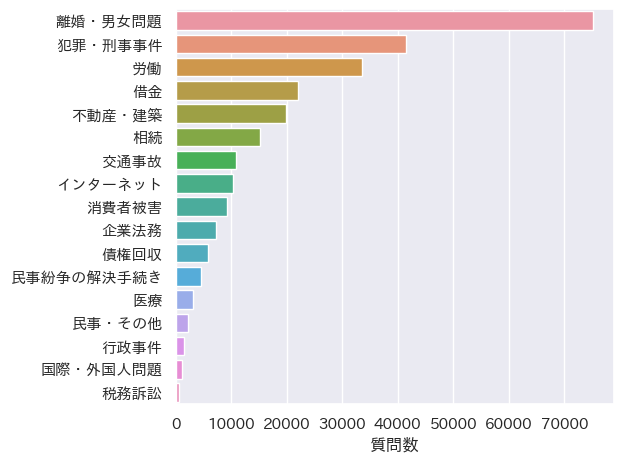

In [63]:
qus_by_cat_cnt = qus_by_cat.apply(len).reset_index()
qus_by_cat_cnt.sort_values(0, ascending=False, inplace=True)
sns.barplot(data=qus_by_cat_cnt, x=0, y='カテゴリ名')
plt.xlabel('質問数')
plt.ylabel(None)
saveplot('dst/stats/qus_by_cat_cnt.svg')

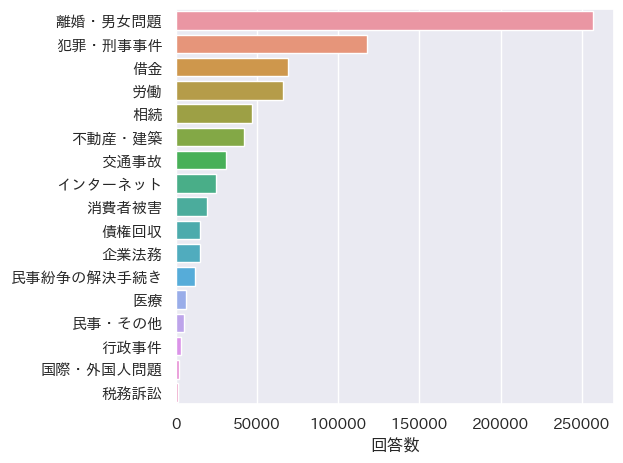

In [64]:
ans_by_cat_cnt = ans_by_cat.apply(len).reset_index()
ans_by_cat_cnt.sort_values(0, ascending=False, inplace=True)
sns.barplot(data=ans_by_cat_cnt, x=0, y='カテゴリ名')
plt.xlabel('回答数')
plt.ylabel(None)
saveplot('dst/stats/ans_by_cat_cnt.svg')

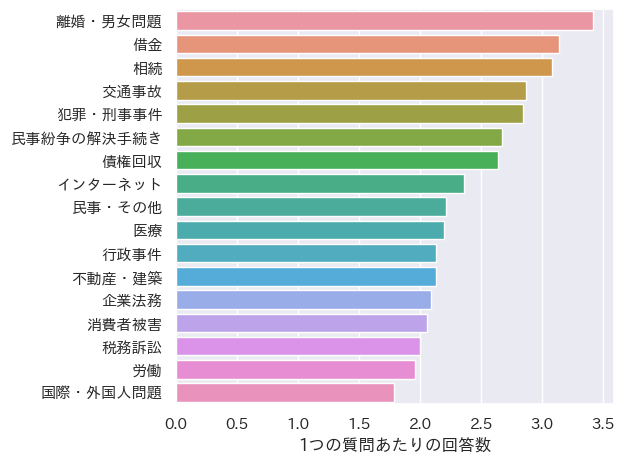

In [77]:
ans_qus_by_cat_cnt = ans_by_cat_cnt.merge(qus_by_cat_cnt.rename({0: 1}, axis='columns'))
ans_qus_by_cat_cnt[2] = ans_qus_by_cat_cnt[0] / ans_qus_by_cat_cnt[1]
ans_qus_by_cat_cnt.sort_values(2, ascending=False, inplace=True)
sns.barplot(data=ans_qus_by_cat_cnt, x=2, y='カテゴリ名')
plt.xlabel('1つの質問あたりの回答数')
plt.ylabel(None)
saveplot('dst/stats/ans_qus_by_cat_cnt.svg')

## 散布図行列

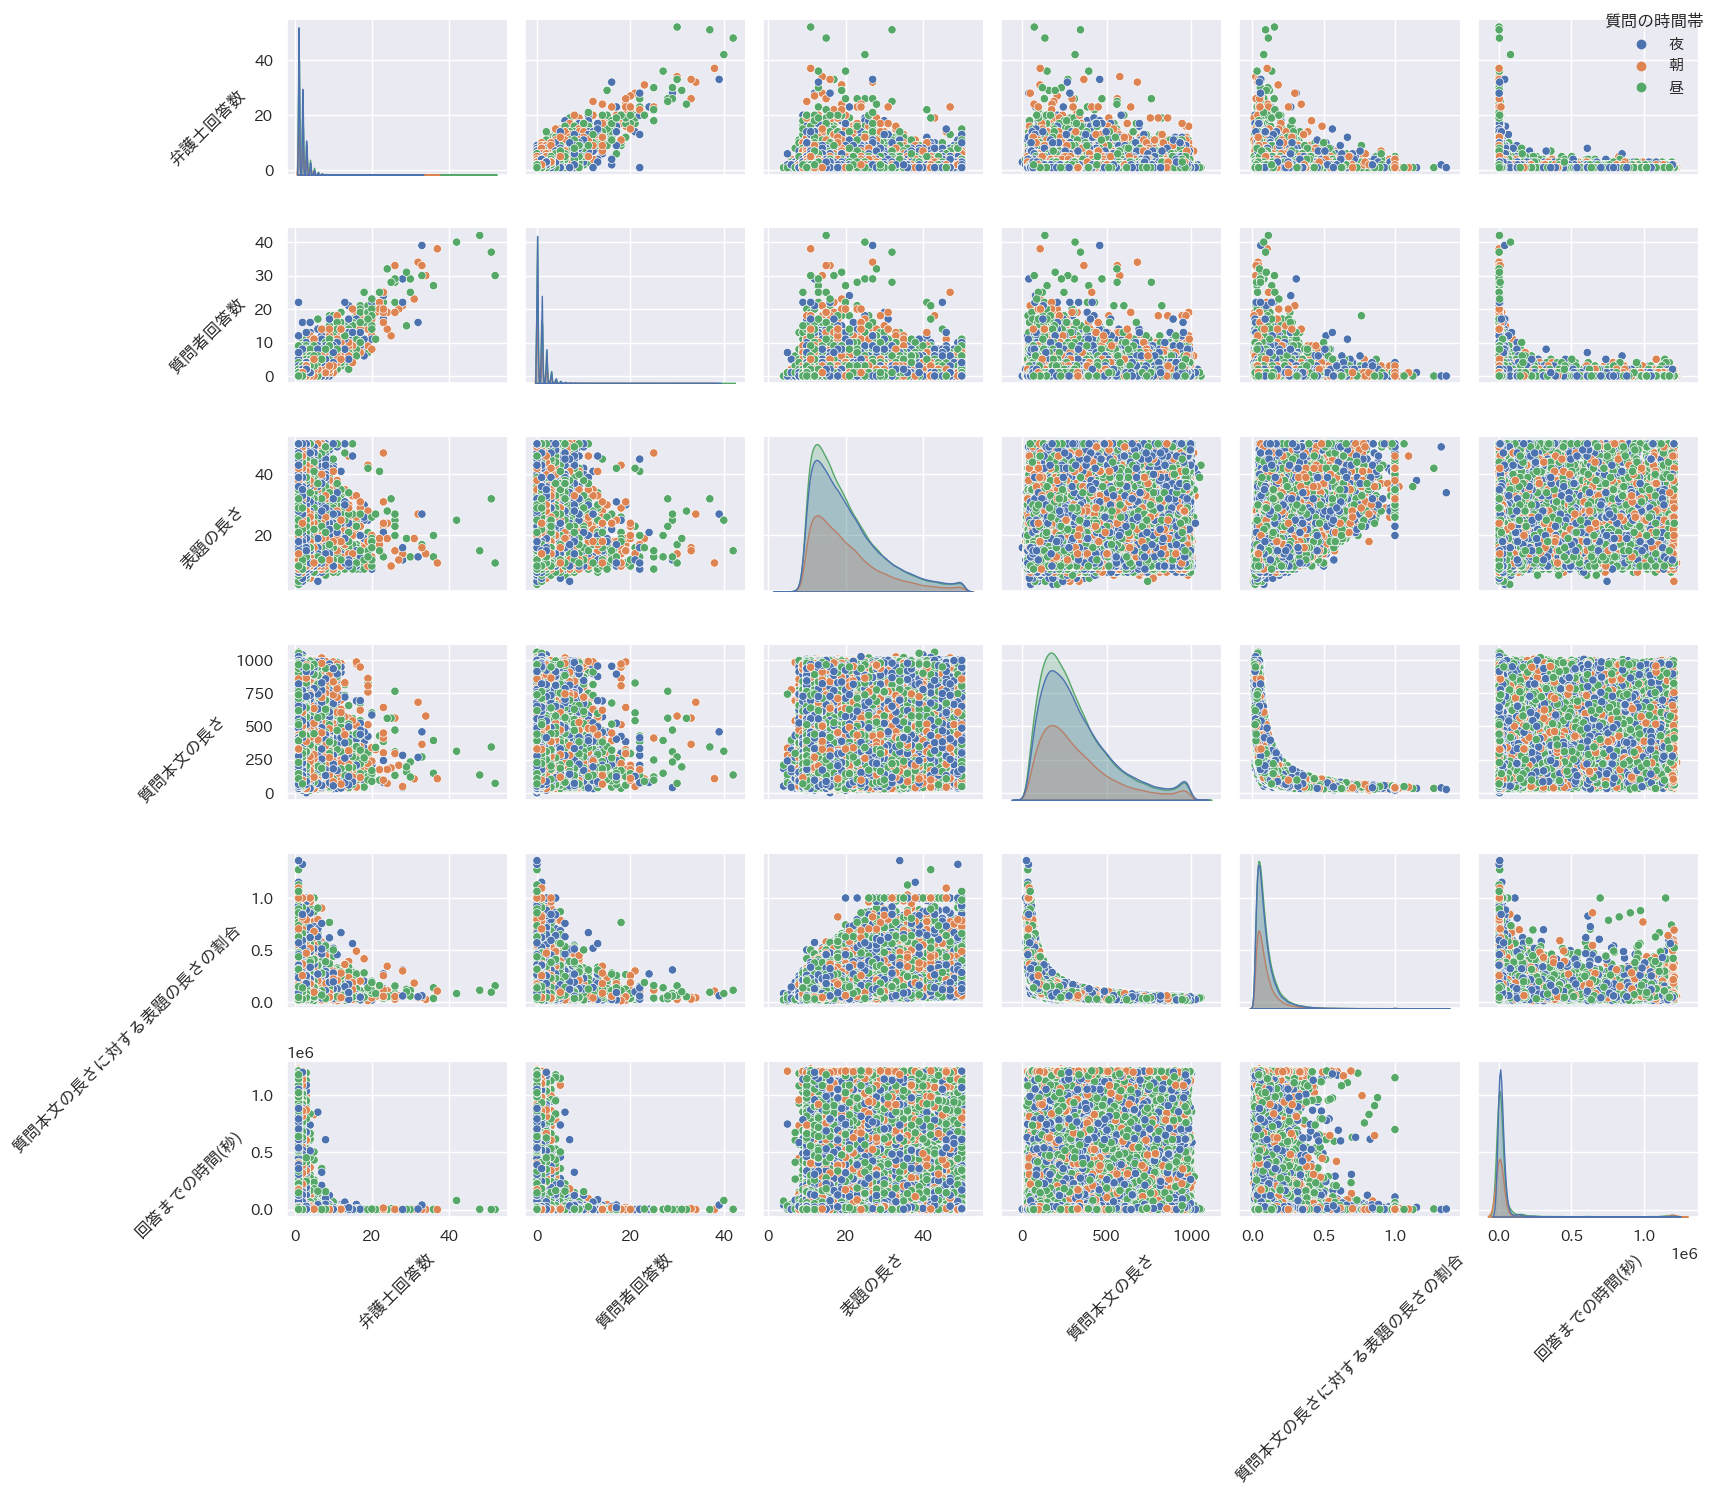

In [31]:
qus_num = qus[['質問ID', '弁護士回答数', '質問者回答数', '表題の長さ', '質問本文の長さ', '質問本文の長さに対する表題の長さの割合', '質問の時間帯']].copy()
qus_num['回答までの時間(秒)'] = [td.total_seconds() for td in qus['回答までの時間']]

g = sns.pairplot(qus_num.drop('質問ID', axis='columns'), hue='質問の時間帯')
g._legend.remove()
g.add_legend(loc='upper right')
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    ax.set_ylabel(ax.get_ylabel(), rotation = 45)
    ax.yaxis.get_label().set_horizontalalignment('right')

saveplot('dst/stats/qus_pair.svg')
saveplot('dst/stats/qus_pair.png', dpi=1000)

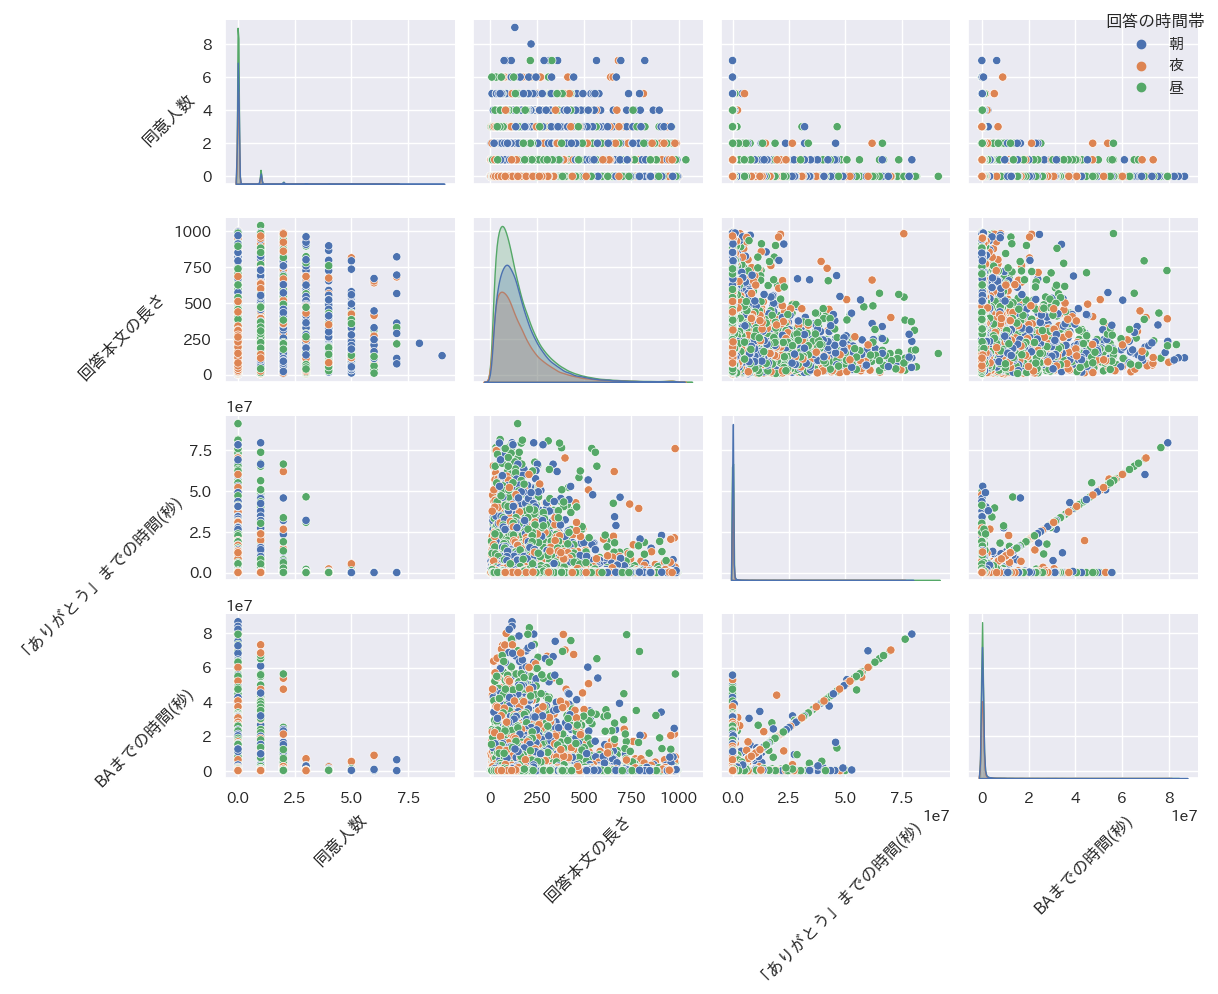

In [32]:
ans_num = ans[['質問ID', '同意人数', '回答本文の長さ', '回答の時間帯']].copy()
ans_num['「ありがとう」までの時間(秒)'] = [td.total_seconds() for td in ans['「ありがとう」までの時間']]
ans_num['BAまでの時間(秒)'] = [td.total_seconds() for td in ans['BAまでの時間']]

g = sns.pairplot(ans_num.drop('質問ID', axis='columns'), hue='回答の時間帯')
g._legend.remove()
g.add_legend(loc='upper right')
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    ax.set_ylabel(ax.get_ylabel(), rotation = 45)
    ax.yaxis.get_label().set_horizontalalignment('right')

saveplot('dst/stats/ans_pair.svg')
saveplot('dst/stats/ans_pair.png', dpi=1000)

In [33]:
qus_ans_num = qus_num.merge(ans_num)
qus_ans_num['回答本文の長さに対する表題の長さの割合'] = qus_ans_num['表題の長さ'] / qus_ans_num['回答本文の長さ']
qus_ans_num['回答本文の長さに対する質問本文の長さの割合'] = qus_ans_num['質問本文の長さ'] / qus_ans_num['回答本文の長さ']

g = sns.pairplot(qus_ans_num.drop(['質問ID', '回答の時間帯'], axis='columns'), hue='質問の時間帯')
g._legend.remove()
g.add_legend(loc='upper right')
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    ax.set_ylabel(ax.get_ylabel(), rotation = 45)
    ax.yaxis.get_label().set_horizontalalignment('right')

saveplot('dst/stats/qus_ans_pair.svg')
saveplot('dst/stats/qus_ans_pair.png', dpi=1000)

: 

: 

## 深層学習